# Pilot Test Clustering 

---

### Notebook Overview

- **Section 1 - Initialization and Setup**
  - Initializes necessary libraries and loads datasets for subsequent analysis.

- **Section 2 - Dataset Source & Description**
  - **Dataset Overview**
    - The Sephora Products and Skincare Reviews dataset from Kaggle provides comprehensive data on skincare products available at Sephora, essential for tasks like trend analysis, sentiment analysis, and machine learning model development.

- **Section 3 - EDA & Data Preprocessing**
  - **Summary of Dataset**
    - Provides a detailed overview of the dataset `product_info_df`, including its structure, key attributes, and statistical insights.
  - **Data Cleaning and Handling Missing Values**
    - Describes the process of handling missing values in the dataset to ensure data quality for analysis.
  - **Feature Extraction and Normalization**
    - Explains the selection and normalization of features for product segmentation and analysis.

- **Section 4 - Clustering and Cluster Factor Calculation**
  - **Clustering**
    - Details the methods used to determine the optimal number of clusters and applies K-Means clustering for segmenting products based on popularity and price.
  - **Cluster Factor Calculations**
    - Defines the cluster factor metric and its normalization to measure average popularity relative to price within each cluster.

- **Section 5 - Data Processing and Export**
  - **Cluster Factors Assignment**
    - Defines the `cluster_factor` dictionary and how it is applied to assign cluster factors to products.
  - **Assigning Cluster Factors to Products**
    - Creates a new DataFrame with enriched product information including cluster factors, preparing it for export.
  - **Saving Processed Data to CSV**
    - Specifies the output path and saves the processed dataset (`product_info_clustered.csv`) with added cluster factors for further analysis.

---

## SECTION 1 - Initialization and Setup

This section involves loading all necessary libraries and datasets into the environment. This includes importing required Python packages for data processing, analysis, visualization, or machine learning. Additionally, datasets will be read in for subsequent analysis steps. Proper loading and initialization of these resources ensures smooth execution of the project's subsequent steps.

In [3]:
# Import statements 
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Normalization 
from sklearn.preprocessing import StandardScaler

# Clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Elbow method
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
# Silhouette method
from sklearn.metrics import silhouette_samples, silhouette_score

---

## SECTION 2 - Dataset Source & Description

The [Sephora Products and Skincare Reviews dataset](https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews) available on Kaggle provides a comprehensive collection of data related to skincare products available at Sephora, a prominent retailer in the beauty industry. This dataset is invaluable for exploring trends in skincare products, analyzing customer sentiments, or developing machine learning models for product recommendation or sentiment analysis tasks.

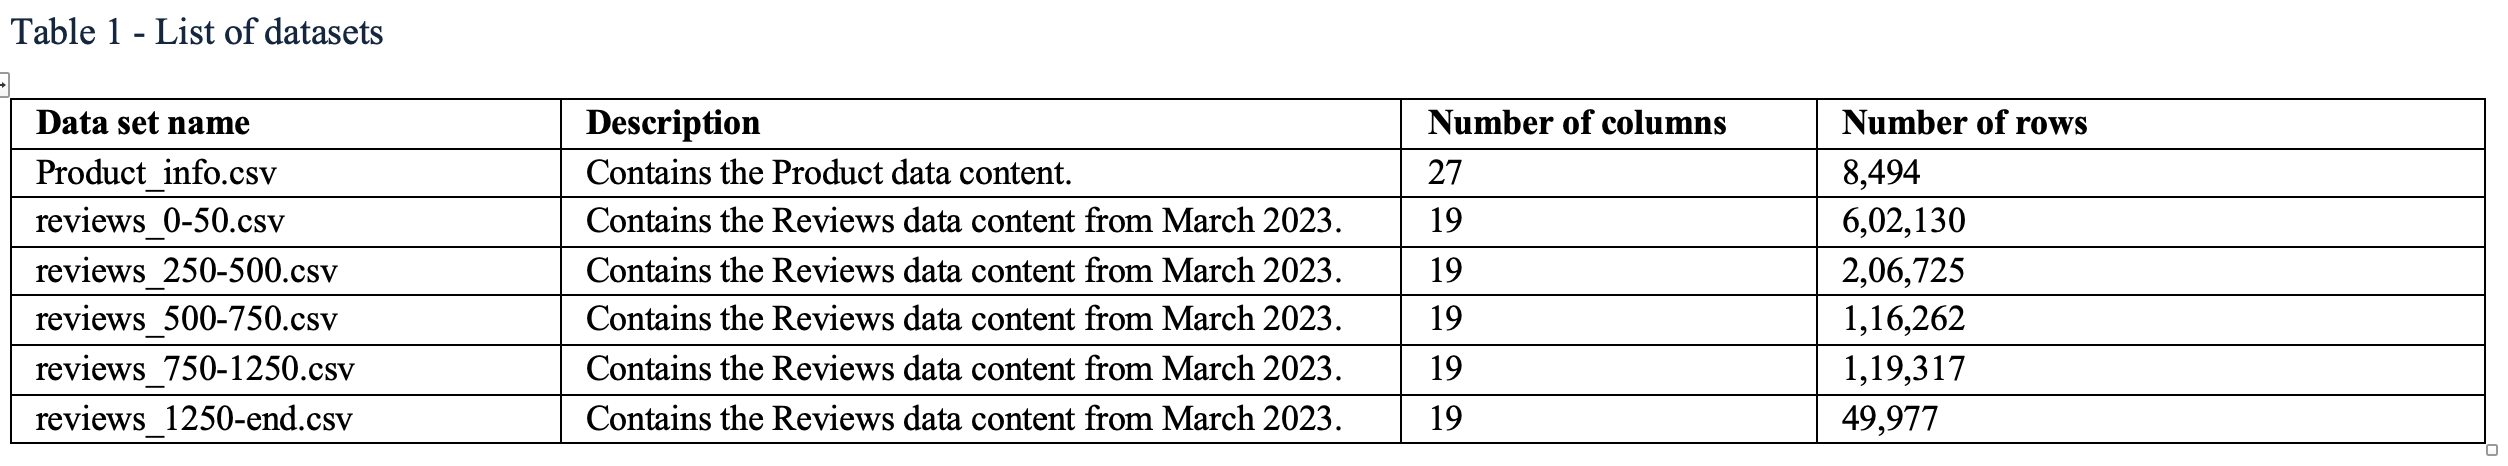

#### Key Features of the Dataset:

- **Products Information**: Detailed attributes of skincare products such as brand, category, price, and ingredients.
- **Customer Reviews**: Sentiment analysis data including ratings, reviews, and user demographics.
- **Brand Diversity**: Covers a wide range of brands available at Sephora, offering insights into brand popularity and customer preferences.

#### Data Sources:

The dataset is compiled from publicly available customer reviews and product information from Sephora's online platform. It is structured to facilitate easy analysis and extraction of insights regarding product performance, customer preferences, and sentiment towards skincare products.


In [4]:
# Define the file paths
# Make sure to download this file to the local machine and use the local path for the product_info_path variable. 

product_info_path = '/Users/mukundhsrikanth/Documents/Exeter Documents/Business School Documents/Business Project/Dataset and Pilot Test/archive/product_info.csv'

# Read into df
product_info_df = pd.read_csv(product_info_path)

---

## SECTION 3 - EDA & Data Preprocessing

#### Summary of Dataset

- The dataset `product_info_df` contains information about 8,494 products across 27 attributes. Here are some key insights:
  
##### Structure

- It comprises 8,494 entries with 27 columns.
- Data types include `object` (12 columns), `float64` (7 columns), and `int64` (8 columns).

##### Attributes

- **Product Information**: `product_id`, `product_name`, `brand_id`, `brand_name`, `size`, `variation_type`, `variation_value`, `variation_desc`, `ingredients`.
- **Numerical Attributes**: `loves_count`, `rating`, `reviews`, `price_usd`, `value_price_usd`, `sale_price_usd`, `child_count`, `child_max_price`, `child_min_price`.
- **Categorical Attributes**: `primary_category`, `secondary_category`, `tertiary_category`, `highlights`.

##### Statistics

- **Numerical Summary**:
  - `price_usd` ranges from \$3 to \$1900 with a mean of \$51.66.
  - `rating` ranges from 1 to 5 with a mean of 4.19.
- **Categorical Insights**:
  - The most frequent primary category is "Skincare" (2,420 occurrences).
  - Top secondary category is "Women" (875 occurrences).
  - Most products are not limited edition (mean of 0.07) and not new (mean of 0.07).



In [5]:
# Understand the data structure
print(product_info_df.info())
print(product_info_df.describe())
print(product_info_df.describe(include='object'))
product_info_df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0


#### Visulize the distribution of data

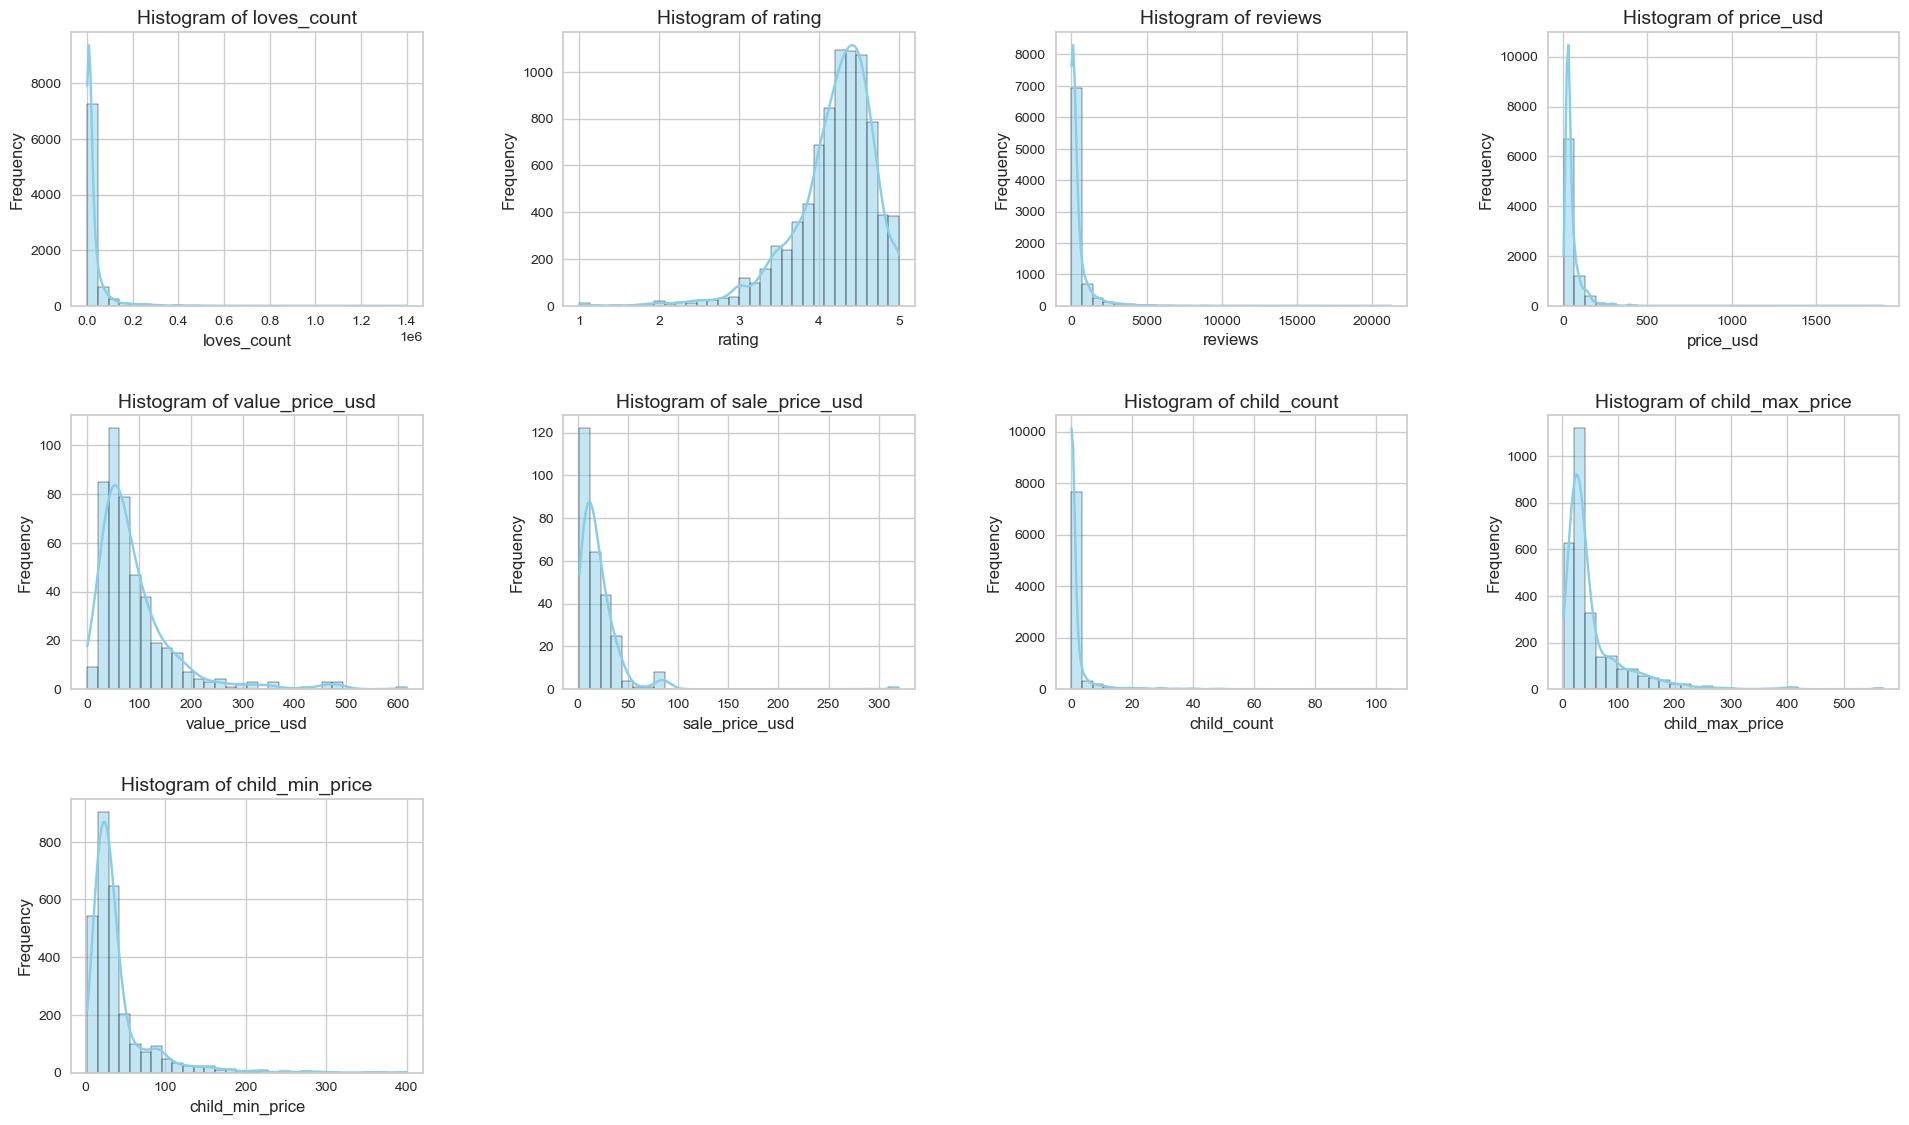

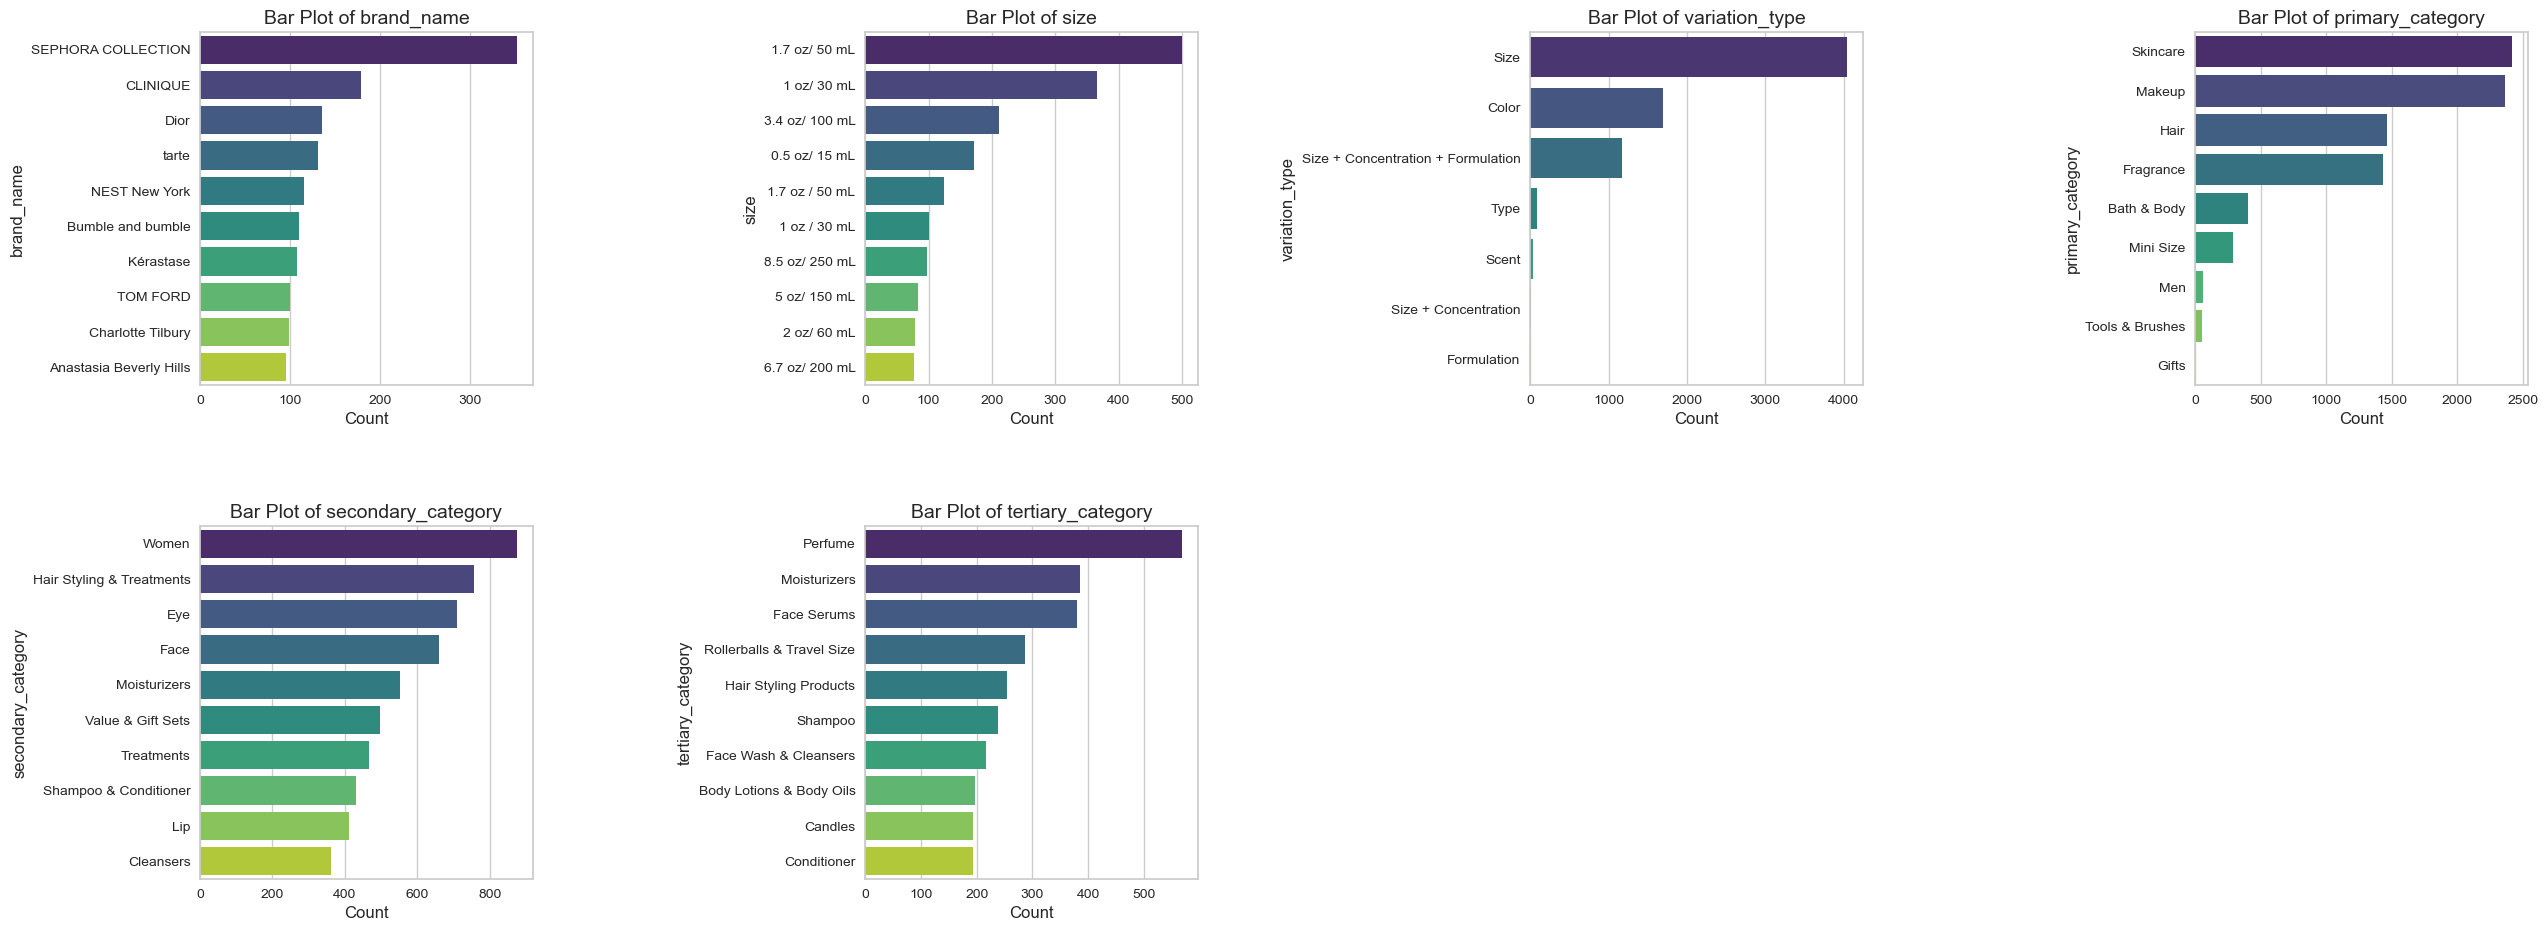

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the numerical and categorical columns
numerical_columns = [
    'loves_count', 'rating', 'reviews', 'price_usd', 'value_price_usd',
    'sale_price_usd', 'child_count', 'child_max_price', 'child_min_price'
]

categorical_columns = [
    'brand_name', 'size', 'variation_type', 'primary_category',
    'secondary_category', 'tertiary_category'
]

# Set the number of rows and columns for the subplot grid for histograms
n_rows_num = len(numerical_columns) // 4 + (len(numerical_columns) % 4 > 0)
n_cols_num = 4

# Create a figure with subplots for histograms
fig_num, axes_num = plt.subplots(n_rows_num, n_cols_num, figsize=(20, 4 * n_rows_num))
fig_num.tight_layout(pad=4.0)

# Plot histograms for numerical columns
for i, col in enumerate(numerical_columns):
    row = i // n_cols_num
    col_num = i % n_cols_num
    ax = axes_num[row, col_num]
    sns.histplot(product_info_df[col].dropna(), bins=30, kde=True, ax=ax, color='skyblue')
    ax.set_title(f'Histogram of {col}', fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)

# Remove any empty subplots for histograms
for j in range(len(numerical_columns), n_rows_num * n_cols_num):
    fig_num.delaxes(axes_num.flatten()[j])

# Improve layout and appearance for histograms
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

# Set the number of rows and columns for the subplot grid for bar plots
n_rows_cat = 3
n_cols_cat = 4

# Create a figure with subplots for bar plots
fig_cat, axes_cat = plt.subplots(n_rows_cat, n_cols_cat, figsize=(25, 5 * n_rows_cat))
fig_cat.tight_layout(pad=4.0)

# Plot bar plots for categorical columns
for i, col in enumerate(categorical_columns):
    row = i // n_cols_cat
    col_num = i % n_cols_cat
    ax = axes_cat[row, col_num]
    value_counts = product_info_df[col].value_counts().head(10)  # Show top 10 categories
    sns.barplot(x=value_counts.values, y=value_counts.index, ax=ax, palette='viridis')
    ax.set_title(f'Bar Plot of {col}', fontsize=14)
    ax.set_xlabel('Count', fontsize=12)
    ax.set_ylabel(col, fontsize=12)

# Remove any empty subplots for bar plots
for j in range(len(categorical_columns), n_rows_cat * n_cols_cat):
    fig_cat.delaxes(axes_cat.flatten()[j])

# Improve layout and appearance for bar plots
plt.subplots_adjust(hspace=0.4, wspace=1)
plt.show()

### Data Cleaning and Handling Missing Values

#### Checking for Null Values

Before proceeding with any analysis or modeling, it's crucial to first assess the quality of the data. One significant aspect of data quality is handling missing values. In the dataset, a thorough examination identified columns with missing data points.

Upon inspection, several columns exhibited varying degrees of missing values. Notably, attributes such as `variation_desc`, `value_price_usd`, `sale_price_usd`, and `highlights` showed significant percentages of missing data. 

#### Handling Missing Values

In the process of data cleaning, the primary strategy was to ensure data completeness, especially for critical attributes that directly impact the analysis. For instance, since the `rating` column serves as a fundamental indicator of product satisfaction, , rows with missing `rating` values were excluded.

By selectively dropping rows with missing `rating` values, the aim was to mitigate potential biases that could arise from incomplete data. This approach aligns with best practices in data preprocessing, where prioritizing complete datasets fosters more accurate and robust analytical outcomes.

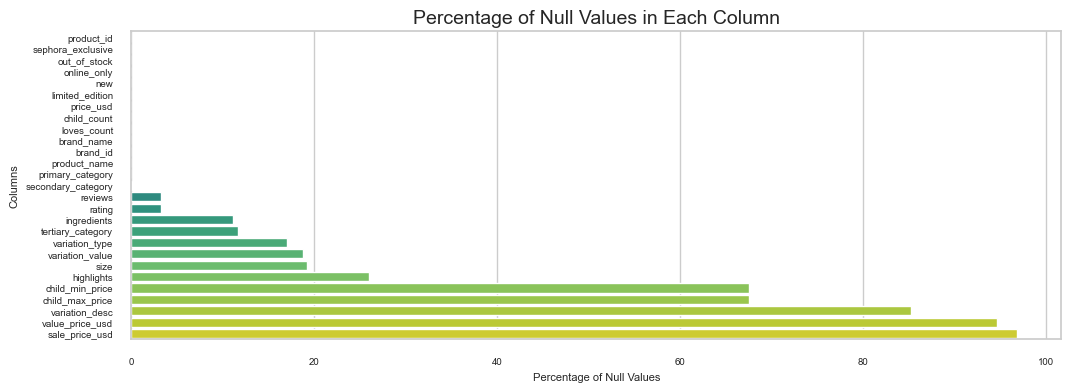


Missing values in Product Info Dataframe:
product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                   0
reviews                  0
size                  1521
variation_type        1334
variation_value       1484
variation_desc        6977
ingredients            894
price_usd                0
value_price_usd       7834
sale_price_usd        7953
limited_edition          0
new                      0
online_only              0
out_of_stock             0
sephora_exclusive        0
highlights            2162
primary_category         0
secondary_category       7
tertiary_category      911
child_count              0
child_max_price       5492
child_min_price       5492
dtype: int64


In [6]:
# Calculate the percentage of null values for each column
null_percentage = product_info_df.isnull().mean() * 100

# Sort the percentages for better visualization
null_percentage_sorted = null_percentage.sort_values()

# Plotting
plt.figure(figsize=(12, 4))
sns.set(style="whitegrid")
palette = sns.color_palette("viridis", len(null_percentage_sorted))

sns.barplot(x=null_percentage_sorted, y=null_percentage_sorted.index, palette=palette)
plt.xlabel('Percentage of Null Values', fontsize=8)
plt.ylabel('Columns', fontsize=8)
plt.title('Percentage of Null Values in Each Column', fontsize=14)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

# Drop the rows where rating is not present 
product_info_df.dropna(subset=['rating'], inplace=True)

# Check for missing values in product_info_df
print("\nMissing values in Product Info Dataframe:")
print(product_info_df.isnull().sum())

### Feature Extraction 

#### Product Segmentation Features

Product segmentation in this analysis is based on product popularity and price. The following columns from the dataset (`product_id`, `loves_count`, `rating`, `reviews`, `price_usd`) will be utilized as features:

1. **Feature Selection for Product Dataset (`Product_info.csv`):**

   - **Popularity Features:** 
     - `loves_count`: Represents the number of likes or loves the product has received, indicating popularity.
     - `rating`: Represents the average rating of the product.
     - `reviews`: Indicates the number of reviews the product has received, which also reflects popularity to some extent.

   - **Price Feature:** 
     - `price_usd`: Represents the price of the product in US dollars.

These features will serve as the basis for segmenting products based on their popularity and price ranges.

In [7]:
# Select the desired features
selected_columns = ['product_id', 'price_usd', 'rating', 'reviews', 'loves_count']

# Filter the dataframe accordingly
filtered_product_df = product_info_df[selected_columns]

# Display the first record
filtered_product_df.head(1)

,product_id,price_usd,rating,reviews,loves_count
0,P473671,35.0,3.6364,11.0,6320


#### Feature Normalization

Before applying machine learning algorithms, it is essential to normalize the features to ensure they are on a similar scale. In this analysis, the features (`loves_count`, `rating`, `reviews`, `price_usd`) will be normalized using `StandardScaler`:

- **StandardScaler:** This scaler standardizes features by removing the mean and scaling to unit variance. It ensures that all features contribute equally to the analysis and prevents any single feature from dominating due to its larger scale.

Normalization helps in improving the performance and stability of machine learning models, particularly those sensitive to the scale of input features.

In [8]:
# Selecting the features to be normalized
features = ['price_usd', 'rating', 'reviews', 'loves_count']

# Initializing the StandardScaler
scaler = StandardScaler()

# Normalizing the features
filtered_product_df[features] = scaler.fit_transform(filtered_product_df[features])

# Display the first record
filtered_product_df.head(1)

,product_id,price_usd,rating,reviews,loves_count
0,P473671,-0.303881,-1.080226,-0.397077,-0.355608


---

### SECTION 4 - Clustering and Cluster Factor Calculation (STAGE 1)

#### Determining Optimal Number of Clusters

To identify the optimal number of clusters for product segmentation, we employed two methods:

- **Elbow Method:** This technique helps in finding the appropriate number of clusters by observing the change in within-cluster sum of squares (inertia) as a function of the number of clusters.
  
- **Silhouette Analysis:** This method evaluates the quality of clustering by measuring the distance between data points within clusters compared to points in neighboring clusters, aiming for clusters with high cohesion and separation.

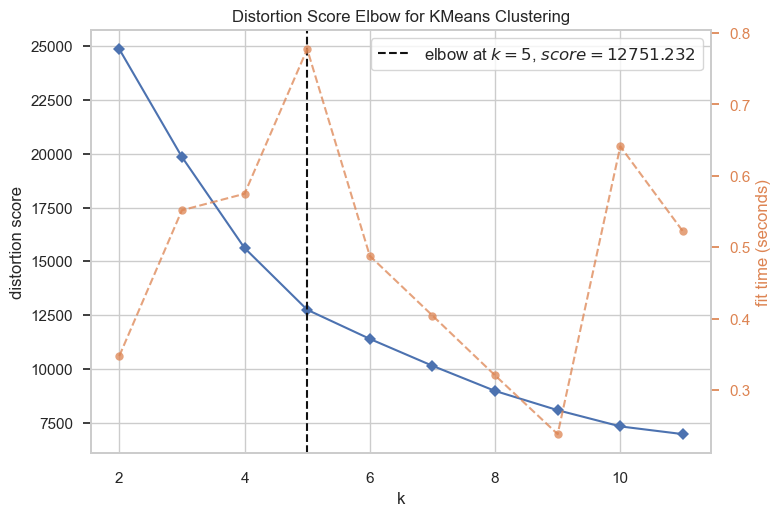

In [9]:
# Determine the optimal number of clusters using the Elbow method
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))

visualizer.fit(filtered_product_df[features])  # Fit the data to the visualizer
visualizer.show()  # Finalize and render the figure

# From the Elbow method
optimal_k = visualizer.elbow_value_

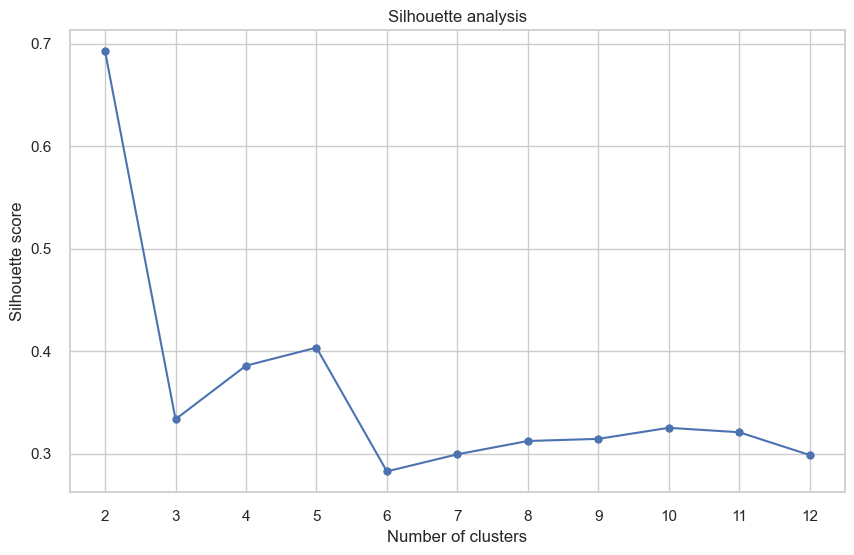

In [10]:
# Range of clusters you want to evaluate
range_n_clusters = range(2, 13)

silhouette_scores = []

for n_clusters in range_n_clusters:
    # Initialize KMeans with n_clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(filtered_product_df[features])
    
    # Compute average silhouette score
    silhouette_avg = silhouette_score(filtered_product_df[features], cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

#### K-Means Clustering and PCA Visualization

After determining the optimal number of clusters (`optimal_k`), the following stpes were performed:

- **K-Means Clustering:** Utilizing K-Means, a partitioning algorithm that assigns each data point to the nearest centroid, forming clusters based on feature similarity.
  
- **PCA for Visualization:** Principal Component Analysis (PCA) was employed to reduce the dimensionality of the data while preserving its variance, facilitating the visualization of clusters in a lower-dimensional space.

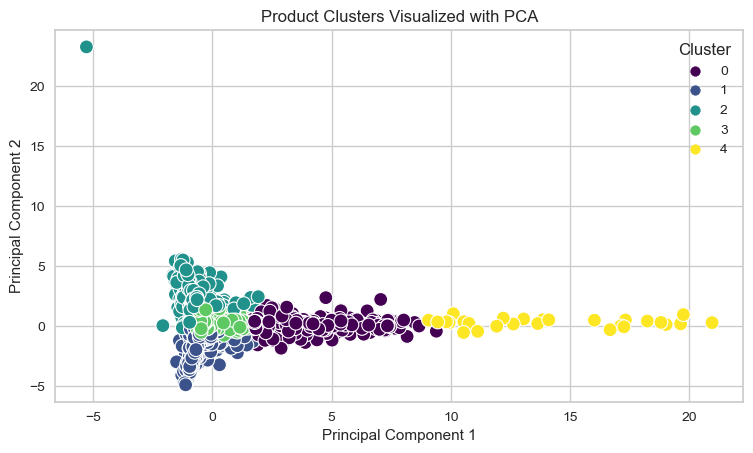

In [81]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
filtered_product_df['cluster'] = kmeans.fit_predict(filtered_product_df[features])

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)
principal_components = pca.fit_transform(filtered_product_df[features])
filtered_product_df['pc1'] = principal_components[:, 0]
filtered_product_df['pc2'] = principal_components[:, 1]

# Visualize the clusters using PCA components
plt.figure(figsize=(8, 5))
sns.scatterplot(data=filtered_product_df, x='pc1', y='pc2', hue='cluster', palette='viridis', s=100)
plt.title('Product Clusters Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')

# Adjust layout to increase whitespace
plt.tight_layout(pad=2.0)  # Increase padding around the plot and labels
plt.show()

#### Cluster Analysis and Summary

Following clustering, we conducted a detailed analysis of each cluster:

- **Cluster Summary:** Extracted key features such as price, rating, reviews, and user engagement metrics alongside their assigned cluster labels to understand the distribution of products across clusters.
  
- **Mean Values by Cluster:** Calculated the average values of features within each cluster to uncover the typical characteristics and preferences associated with products in different segments.
  
- **Cluster Analysis Results:** Presented the mean feature values across clusters in a pivot table format, enabling a comparative analysis of product segments based on their attributes.

In [82]:
# Step 1 : Assign the cluster lable to the original df
filtered_product_df_cluster_summary = filtered_product_df[['price_usd', 'rating', 'reviews', 'loves_count', 'cluster']]

# Step 2: Group by clusters
grouped = filtered_product_df_cluster_summary.groupby('cluster')

# Step 3: Calculate mean values within each cluster
mean_values = grouped.mean()

# Step 4: Create a pivot table
pivot_table = mean_values.T  # Transpose to have features on the y-axis and clusters on the x-axis

# Print or display the pivot table
print(pivot_table)

cluster             0         1         2         3          4
price_usd   -0.260365 -0.300372  2.373757 -0.208690  -0.419355
rating       0.147406 -1.479049  0.188671  0.420767   0.272149
reviews      2.141421 -0.274228 -0.172954 -0.122136  11.167902
loves_count  2.554085 -0.217962 -0.256337 -0.151425   9.092620


### Cluster Factor Calculations

After clustering and analyzing the statistics, a factor called average popularity was further investigated, calculated as the mean score of rating, reviews, and loves_count features.

##### Identified Clusters and Calculations

The clustering process revealed 5 distinct clusters, which have been categorized and described as follows:

1. **Cluster 4: Highly Popular and Affordable**
   - This cluster includes products that are highly popular among consumers and are priced relatively lower compared to others in the dataset.

2. **Cluster 0: Very Popular and Mid-Range**
   - Products in this cluster are very popular in terms of consumer interest and fall within a mid-range pricing category.

3. **Cluster 1: Moderately Popular and Affordable**
   - These products are moderately popular and are available at a lower price point compared to the average.

4. **Cluster 2: Less Popular and Expensive**
   - This cluster consists of products that are less popular among consumers and are expensive.

5. **Cluster 3: Less Popular and Mid-Range**
   - Products in this cluster are priced at mid-range popularity category and are least popular.


The cluster factor is a metric used to measure the average popularity of products in a cluster relative to the average price of products in the cluster. It is calculated using the following equation:

$$Ca = \frac{AvgPo}{AvgPr}$$

where:

* $Ca$ is the cluster factor
* $AvgPo$ is Average popularity of the product in the cluster
* $AvgPr$ is Average price of the product in the cluster

The following equation was used to normalize the cluster factors

$$Ca = \frac{Ci - minvalue}{maxvalue - minvalue}$$

where:

* $Ca$ is the Normalized cluster factor
* $Ci$ is the original value of cluster factor
* $minvalue$ is the minimum value of cluster factor
* $maxvalue$ is the maximum value of cluster factor

   
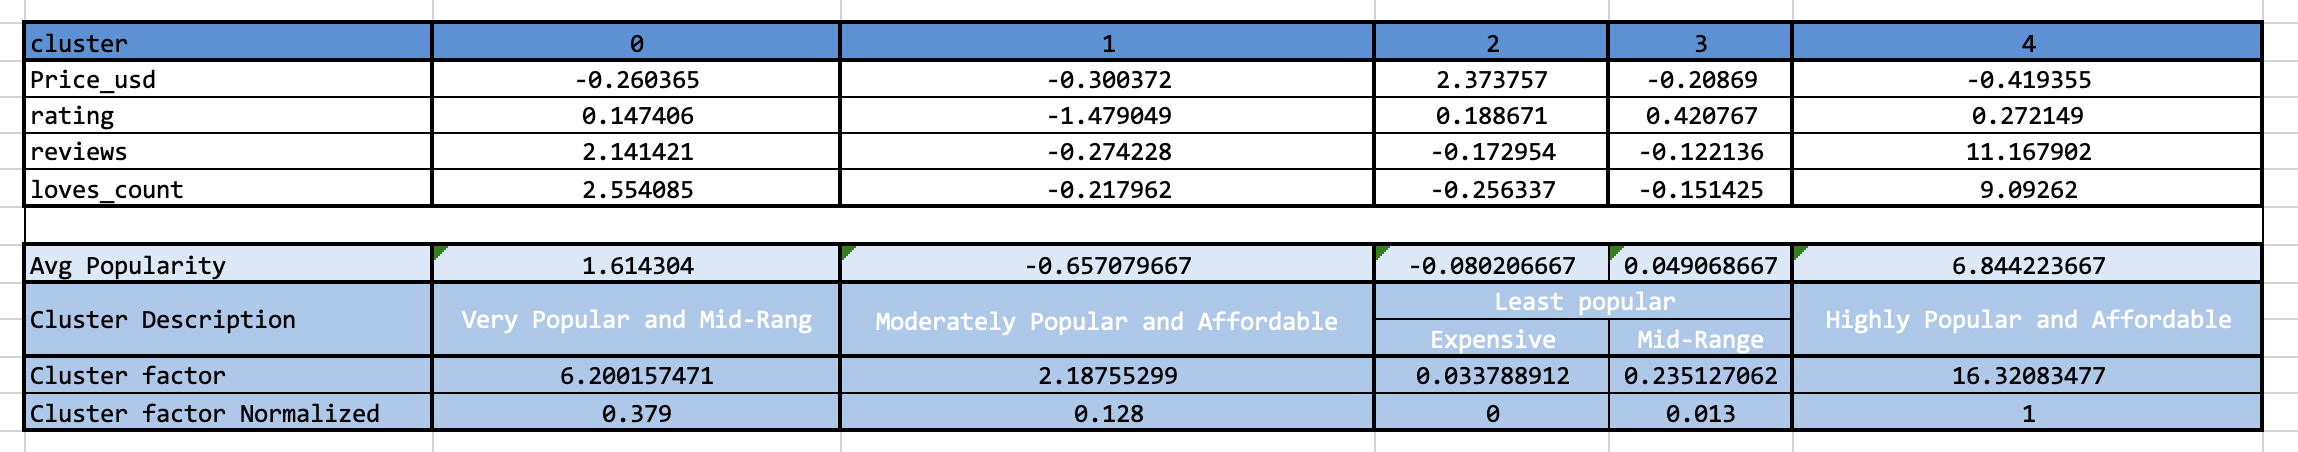


---

## SECTION 5 - Data Processing and Export

#### Cluster Factors Assignment

The `cluster_factor` dictionary is defined where each key represents a cluster and its corresponding value represents the calculated cluster factor.

#### Assigning Cluster Factors to Products

A new DataFrame named `filtered_product_cluster_df` is created to include essential product information (`product_id`, `price_usd`, `rating`, `reviews`, `loves_count`) and incorporates a `cluster_factor` column. This column is populated by mapping the `cluster_factor dictionary` to the `cluster` column of `filtered_product_df`.

#### Saving Processed Data to CSV

he output path is specified for saving the enriched dataset as a CSV file (`product_info_clustered.csv`). This file contains the product data with added cluster factors, facilitating further analysis for hybrid product recommendation models.

In summary, this workflow enhances product data by incorporating cluster-specific factors and exports the processed dataset for downstream use-cases.

In [84]:
# Cluster factors from excel for each cluster 
cluster_factor = {
    0: 0.379,
    1:0.128,
    2: 0.379,
    3:0.013,
    4:1
}

# Assigning each product a cluster factor
filtered_product_cluster_df = filtered_product_df[['product_id','price_usd', 'rating', 'reviews', 'loves_count', 'cluster']]
filtered_product_cluster_df['cluster_factor'] = filtered_product_cluster_df['cluster'].map(cluster_factor)

filtered_product_cluster_df.head(1)

,product_id,price_usd,rating,reviews,loves_count,cluster,cluster_factor
0,P473671,-0.303881,-1.080226,-0.397077,-0.355608,1,0.128


In [85]:
# Specify your output path for CSV file
output_path = '/Users/mukundhsrikanth/Documents/Exeter Documents/Business School Documents/Business Project/Dataset and Pilot Test/archive/product_info_clustered.csv'

# Save the DataFrame to CSV
filtered_product_cluster_df.to_csv(output_path, index=False)

print(f"DataFrame saved to {output_path}")

DataFrame saved to /Users/mukundhsrikanth/Documents/Exeter Documents/Business School Documents/Business Project/Dataset and Pilot Test/archive/product_info_clustered.csv


### Important notes

#### Importances of filtered_product_cluster_df 

The output of DataFrame named `filtered_product_cluster_df` is important as it will be used in Stage 2 & 3. 
Please ensure to use a correct output path as this will be reference going forward. 